<h1> Welcome to the 3<sup>rd</sup> theory part for PE1!</h1>
Many times we are only interested in the magnitude part of a signal with a certain frequency and want to know the intensity of the signal with a given frequency. We can do this using Fourier Transform and Parseval's theorem.

As you might have noticed, if you do a fast fourier transform of a perfect sine wave, you do not get a perfect delta function, but something which has more resemblance of a Gaussian, like shown below:

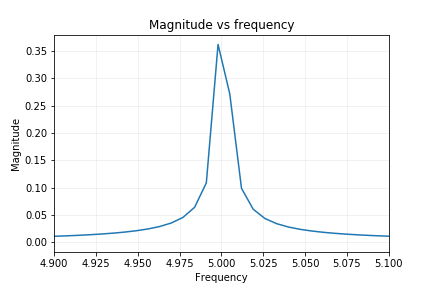

 The peak of this Gaussian does not give back the amplitude of the signal. We do however still want to get the intensity of this signal. To do this, we will use Parseval's theorem, which states

$$
    I \propto \int_{-\infty}^{\infty} |F(\omega)|^2 d\omega
$$

Where $I$ is the intensity or the power density of the signal and $F(\omega)$ the Fourier transform of the signal. If we are only interested in the intensity of the part of the signal at a certain frequency, we can use

$$
    I(\omega) \propto \int_{\omega_i- \Delta \omega}^{\omega_i + \Delta \omega} |F(\omega_i)|^2 d\omega
$$

Where we only integrate over a finite interval around some frequency $\omega$ with width $2\cdot\Delta \omega$. The goal for this theory part is to get the power, or intensity, from a fast Fourier transform.

In [1]:
# Installs some basic functions

%pylab inline
#from matplotlib import pyplot as plt
#import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<h3> Integrating over a discrete set of points</h3>
The theory described in the introduction is of course only applicable to continuous signals. We are, however, dealing with discrete signals and therefore need to find a way to integrate over these signals. In the following cells, such a method is given.

In [2]:
"""
The following function integrates over the whole set of datapoints, where x
are the x values of your datapoints and y the y values.
"""
def integral(x,y):
    #integral functions from scipy will be used to integrate over the datapoints
    return integrate.trapz(y, x)

In [3]:
#Define the rate and the amount of sample points
rate = 500
samples = 5000

#Create the time data array
t = np.linspace(0, samples/rate, samples)

#Create an artificial signal
signal = 2*t+1

#Get the total surface underneath the signal
#(In other words, integrate the signal)
integratedSignal = integral(t,signal)

"""
Check if the value corresponds with the integral of 2x+1 from 0 to 10.
"""
print(integratedSignal)

110.0


<h3> Getting the power</h3>
We can use this integration method to get the power at a specific frequency from the fast Fourier transform. This gives us a nice approximation for the intensity at a certain frequency.

In [4]:
"""
Function to get the power.

freqs is the array with frequencies
fft is the array with the fft values

f is the frequency at which you want to get the power
delta_f is the width of the interval over which you want to integrate
"""
def power(freqs, fft, f, delta_f):
    """
    Get the integration interval, this is a boolean array of frequencies, which
    is true when a frequency is inside the interval and false otherwise. This is used
    to find the frequencies over which we need to integrate.
    """
    interval = (freqs > f - delta_f) & (freqs < f + delta_f)
    
    #get the power by integrating over the interval
    power = integral(freqs[interval], np.abs(fft[interval])**2)
    
    return power

In [ ]:
#Here follows an example for the power density signal

#Create an artificial signal
signal2 = np.sin(2*np.pi*10*t) + 0.5*np.sin(2*np.pi*15*t) + 0.2*np.sin(2*np.pi*18*t)

plt.plot(t, signal2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Time")
plt.xlim(0, 1)
plt.show()

#Do a fast fourier transform
fft = np.fft.fft(signal2)
freqs = np.fft.fftfreq(len(signal2), 1/rate)

plt.plot(freqs, np.abs(fft))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude vs frequency")
plt.xlim(0, 20)
plt.show()

"""
We want to get the power of each individual peak. We know that we have peaks at
10 Hz, 15Hz and 18Hz. It is important that we chose our delta_f correctly, such that the
integration interval includes a whole peak, but does not contain any other peak. Choosing
delta_f = 1 is sufficient in this case.
"""

#Getting the power densities:

power10Hz = power(freqs, fft, 10, 1)
print("Power at 10Hz = ", power10Hz)

power15Hz = power(freqs, fft, 15, 1)
print("Power at 15Hz = ", power15Hz)

power18Hz = power(freqs, fft, 18, 1)
print("Power at 18Hz = ", power18Hz)

"""
Check if the ratios between the power correspond to the ratios between the
amplitudes of the different sine waves. 

Tip: What is the relation between power (intensity) and amplitude?
"""